<a href="https://colab.research.google.com/github/AmiraliEsi83/ImageNet-data-base/blob/main/vgg16onIMAGENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=7fd782f5fba96eedfc4aa2925c303b87b2542880d74b81f29a26d0d3eca6bb50
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


###download Imagenet data-set from Stanford URL
###100_000images in 200 classes
####training_data + validation_data + test_data

In [2]:
import os, sys, wget
from zipfile import ZipFile
url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
tiny_imgdataset = wget.download('http://cs231n.stanford.edu/tiny-imagenet-200.zip', out = os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".zip"):
        zip = ZipFile(file)
        zip.extractall()
    else:
        print("not found")

not found
not found


In [3]:
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
# check for gpu avaiability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


### show sample image from training set

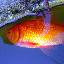

In [5]:
from IPython.display import Image
Image('/content/tiny-imagenet-200/train/n01443537/images/n01443537_100.JPEG')

## Prepare our data from paths

In [6]:
import os
f = open('/content/tiny-imagenet-200/wnids.txt')
all_files = [fn.strip() for fn in f.readlines()]
all_files
len(all_files)

200

In [7]:
file_names = ['/content/tiny-imagenet-200/train/'+fn+'/images/'+fn+'_' for fn in all_files]
file_names

['/content/tiny-imagenet-200/train/n02124075/images/n02124075_',
 '/content/tiny-imagenet-200/train/n04067472/images/n04067472_',
 '/content/tiny-imagenet-200/train/n04540053/images/n04540053_',
 '/content/tiny-imagenet-200/train/n04099969/images/n04099969_',
 '/content/tiny-imagenet-200/train/n07749582/images/n07749582_',
 '/content/tiny-imagenet-200/train/n01641577/images/n01641577_',
 '/content/tiny-imagenet-200/train/n02802426/images/n02802426_',
 '/content/tiny-imagenet-200/train/n09246464/images/n09246464_',
 '/content/tiny-imagenet-200/train/n07920052/images/n07920052_',
 '/content/tiny-imagenet-200/train/n03970156/images/n03970156_',
 '/content/tiny-imagenet-200/train/n03891332/images/n03891332_',
 '/content/tiny-imagenet-200/train/n02106662/images/n02106662_',
 '/content/tiny-imagenet-200/train/n03201208/images/n03201208_',
 '/content/tiny-imagenet-200/train/n02279972/images/n02279972_',
 '/content/tiny-imagenet-200/train/n02132136/images/n02132136_',
 '/content/tiny-imagenet-

In [8]:
file_names_test = os.listdir('/content/tiny-imagenet-200/test/images')

In [9]:
len(file_names_test)

10000

In [10]:
file_names_test = ['/content/tiny-imagenet-200/test/images/test_'+str(i)+'.JPEG' for i in range(len(file_names_test))]

In [11]:
file_names_test, len(file_names_test)

(['/content/tiny-imagenet-200/test/images/test_0.JPEG',
  '/content/tiny-imagenet-200/test/images/test_1.JPEG',
  '/content/tiny-imagenet-200/test/images/test_2.JPEG',
  '/content/tiny-imagenet-200/test/images/test_3.JPEG',
  '/content/tiny-imagenet-200/test/images/test_4.JPEG',
  '/content/tiny-imagenet-200/test/images/test_5.JPEG',
  '/content/tiny-imagenet-200/test/images/test_6.JPEG',
  '/content/tiny-imagenet-200/test/images/test_7.JPEG',
  '/content/tiny-imagenet-200/test/images/test_8.JPEG',
  '/content/tiny-imagenet-200/test/images/test_9.JPEG',
  '/content/tiny-imagenet-200/test/images/test_10.JPEG',
  '/content/tiny-imagenet-200/test/images/test_11.JPEG',
  '/content/tiny-imagenet-200/test/images/test_12.JPEG',
  '/content/tiny-imagenet-200/test/images/test_13.JPEG',
  '/content/tiny-imagenet-200/test/images/test_14.JPEG',
  '/content/tiny-imagenet-200/test/images/test_15.JPEG',
  '/content/tiny-imagenet-200/test/images/test_16.JPEG',
  '/content/tiny-imagenet-200/test/images

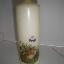

In [12]:
Image(file_names_test[0])

In [13]:
len(file_names_test)

10000

In [14]:
all_pic_path = []
for i in range(len(file_names)):
  for j in range(500):
    all_pic_path.append(file_names[i]+str(i)+'.JPEG')

In [15]:
print(len(all_pic_path))
print(all_pic_path[0])

100000
/content/tiny-imagenet-200/train/n02124075/images/n02124075_0.JPEG


In [16]:
X = all_pic_path

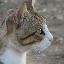

In [17]:
Image(all_pic_path[0])

In [18]:
import numpy as np
y = []
for i in range(200):
  y.append([i]*500)

In [19]:
y = np.array(y)
y.shape

(200, 500)

In [20]:
y = y.ravel()
print(len(y))
print(y[500])

100000
1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
NUM_OF_IMAGES = 1000
X_train, X_val,y_train, y_val = train_test_split(X[:NUM_OF_IMAGES], y[:NUM_OF_IMAGES], test_size =0.2, random_state=42)

In [23]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [24]:
print(X_train[0])
print(y_train[0])

/content/tiny-imagenet-200/train/n02124075/images/n02124075_0.JPEG
0


In [25]:
from matplotlib.pyplot import imread

In [26]:
image = imread(X[0])
image.shape

(64, 64, 3)

In [27]:
image.max()

248

In [28]:
image.min()

0

convert image to tensor

In [29]:
tf.constant(image)

<tf.Tensor: shape=(64, 64, 3), dtype=uint8, numpy=
array([[[102, 107, 100],
        [115, 118, 111],
        [117, 118, 112],
        ...,
        [125, 124, 119],
        [121, 120, 115],
        [120, 119, 114]],

       [[ 89,  94,  87],
        [ 98, 103,  96],
        [105, 108, 101],
        ...,
        [117, 116, 111],
        [113, 112, 107],
        [110, 109, 104]],

       [[ 61,  66,  59],
        [ 77,  82,  75],
        [ 91,  94,  87],
        ...,
        [115, 114, 109],
        [113, 112, 107],
        [109, 108, 103]],

       ...,

       [[102, 109, 119],
        [127, 133, 145],
        [151, 159, 170],
        ...,
        [119, 116, 111],
        [123, 120, 115],
        [117, 114, 109]],

       [[ 76,  83,  93],
        [ 89,  96, 106],
        [111, 119, 130],
        ...,
        [103, 100,  95],
        [106, 103,  98],
        [ 98,  95,  90]],

       [[ 71,  78,  88],
        [ 69,  76,  86],
        [ 81,  87,  99],
        ...,
        [106, 103,  98]

In [30]:
IMG_SIZE = 224

In [31]:
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  # scale and normalize values between 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
  return image

In [32]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return (image,label)

In [33]:
get_image_label(X[22], tf.constant(y[22]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.40000004, 0.42352945, 0.38431376],
         [0.40000004, 0.42352945, 0.38431376],
         [0.40924373, 0.43277314, 0.39355746],
         ...,
         [0.46834734, 0.46834734, 0.4369748 ],
         [0.4666667 , 0.4666667 , 0.43529415],
         [0.4666667 , 0.4666667 , 0.43529415]],
 
        [[0.40000004, 0.42352945, 0.38431376],
         [0.40000004, 0.42352945, 0.38431376],
         [0.40924373, 0.43277314, 0.39355746],
         ...,
         [0.46834734, 0.46834734, 0.4369748 ],
         [0.4666667 , 0.4666667 , 0.43529415],
         [0.4666667 , 0.4666667 , 0.43529415]],
 
        [[0.38823533, 0.41176474, 0.37254906],
         [0.38823533, 0.41176474, 0.37254906],
         [0.39729896, 0.42082837, 0.3816127 ],
         ...,
         [0.4603041 , 0.4603041 , 0.42893156],
         [0.45826334, 0.45826334, 0.4268908 ],
         [0.45826334, 0.45826334, 0.4268908 ]],
 
        ...,
 
        [[0.282633  , 0.310084  

In [34]:
BATCH_SIZE = 32

In [35]:
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data=False):
  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch


In [36]:
training_data = create_data_batches(X_train, y_train)

In [37]:
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [38]:
test_data = create_data_batches(file_names_test, test_data=True)

In [39]:
import matplotlib.pyplot as plt

In [40]:
def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(y[i])

In [41]:
training_images, train_labels = next(training_data.as_numpy_iterator())

In [42]:
training_images, train_labels

(array([[[[0.40000004, 0.42352945, 0.38431376],
          [0.40000004, 0.42352945, 0.38431376],
          [0.40924373, 0.43277314, 0.39355746],
          ...,
          [0.46834734, 0.46834734, 0.4369748 ],
          [0.4666667 , 0.4666667 , 0.43529415],
          [0.4666667 , 0.4666667 , 0.43529415]],
 
         [[0.40000004, 0.42352945, 0.38431376],
          [0.40000004, 0.42352945, 0.38431376],
          [0.40924373, 0.43277314, 0.39355746],
          ...,
          [0.46834734, 0.46834734, 0.4369748 ],
          [0.4666667 , 0.4666667 , 0.43529415],
          [0.4666667 , 0.4666667 , 0.43529415]],
 
         [[0.38823533, 0.41176474, 0.37254906],
          [0.38823533, 0.41176474, 0.37254906],
          [0.39729896, 0.42082837, 0.3816127 ],
          ...,
          [0.4603041 , 0.4603041 , 0.42893156],
          [0.45826334, 0.45826334, 0.4268908 ],
          [0.45826334, 0.45826334, 0.4268908 ]],
 
         ...,
 
         [[0.282633  , 0.310084  , 0.34145653],
          [0.28263

In [43]:
len(training_images),len(train_labels)

(32, 32)

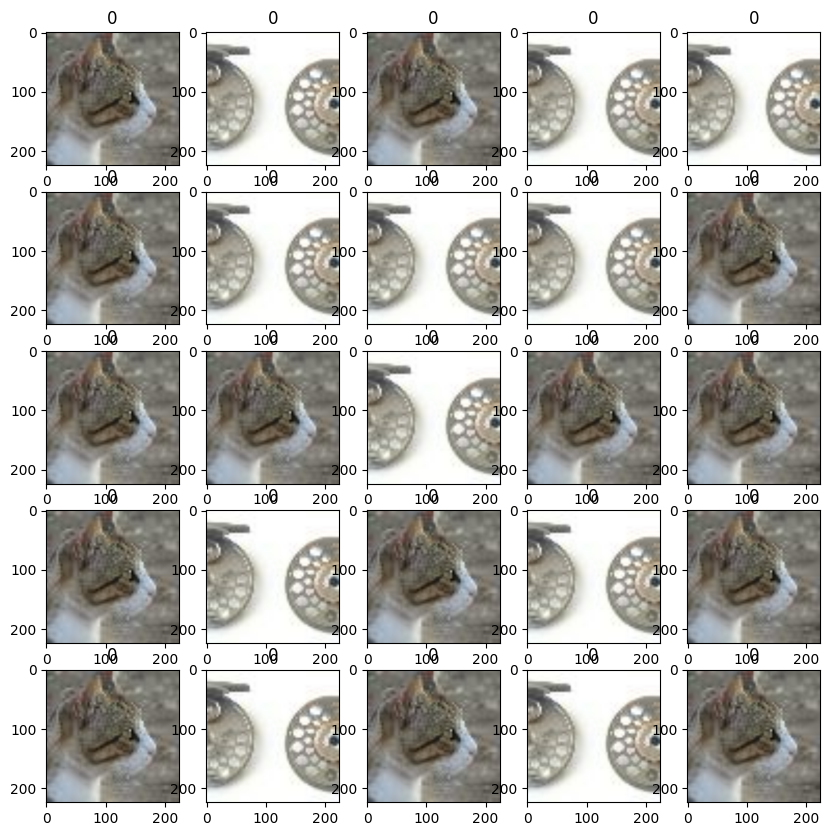

In [44]:
show_25_images(training_images, train_labels)

In [45]:
import tensorflow.keras as tk
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential

In [46]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=200,
                    input_shape=(224,224,3)
                   )

58889256/58889256 [==============================] - 3s 0us/step


In [47]:
model = tf.keras.Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [48]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(4096, activation='relu', name='hidden1'))
model.add(Dense(200, activation='softmax', name='predictions'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [49]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [50]:
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [51]:
history = model.fit(x = training_data,batch_size=32, epochs=10,validation_data=val_data, validation_freq=1)

Epoch 1/10
25/25 [==============================] - 41s 505ms/step - loss: 0.2303 - accuracy: 0.9388 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 12s 461ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 12s 464ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 12s 472ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 12s 472ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 11s 455ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 11s 461ms/step - loss: 0.0000e+00 - accuracy: 

In [52]:
evaluation = model.evaluate(val_data)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

7/7 [==============================] - 1s 112ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 100.00%


In [53]:
predicted_classes = model.predict(test_data)
predicted_classes

313/313 [==============================] - 42s 135ms/step


array([[9.9999928e-01, 6.9741782e-07, 6.3517241e-25, ..., 4.7299358e-24,
        9.8660132e-23, 1.0324758e-21],
       [1.0000000e+00, 1.4087456e-10, 3.3058125e-38, ..., 2.5330223e-37,
        6.7849345e-35, 4.8268329e-33],
       [9.9999964e-01, 3.7535438e-07, 2.1693206e-37, ..., 6.3618199e-38,
        6.7919237e-35, 3.2379367e-33],
       ...,
       [1.0000000e+00, 5.7505165e-09, 0.0000000e+00, ..., 0.0000000e+00,
        1.6776209e-36, 2.6054482e-35],
       [4.1006975e-02, 9.5899302e-01, 1.4307029e-27, ..., 3.5754731e-27,
        1.7317931e-25, 1.1429355e-24],
       [9.8799163e-01, 1.2008438e-02, 4.3550640e-32, ..., 2.0640656e-31,
        1.4898374e-29, 1.2705837e-28]], dtype=float32)

In [54]:
print(predicted_classes[0])


[9.99999285e-01 6.97417818e-07 6.35172411e-25 4.22742355e-22
 7.94400223e-23 2.37338526e-24 1.06714318e-25 6.71400552e-25
 1.58993805e-22 1.58716179e-23 1.22192976e-22 2.41911754e-23
 1.63638230e-23 3.30703366e-23 2.32142378e-24 6.91499314e-23
 1.36824516e-23 3.11987672e-23 6.80352772e-23 4.09376577e-22
 7.79037694e-24 6.73314240e-24 5.25208697e-23 4.05679412e-24
 1.44118561e-23 4.10998819e-24 5.74329689e-25 3.63750137e-23
 5.81377195e-24 5.59209493e-24 4.36053247e-23 3.66774715e-25
 3.61501051e-22 4.56995405e-24 1.04160516e-23 3.02446372e-24
 2.78176781e-21 1.52160816e-24 2.91097346e-24 6.00290143e-23
 9.35370815e-25 4.02877220e-24 6.35538689e-24 2.65666078e-21
 2.39290480e-23 1.10012008e-24 1.16666641e-24 4.62915999e-21
 8.33019950e-23 1.15675743e-24 2.57380149e-23 3.07020582e-24
 1.21049411e-21 7.86467514e-22 1.51135810e-23 8.37614324e-24
 5.99903002e-24 3.32660553e-24 5.13817648e-24 2.35019618e-23
 4.25827268e-22 2.44352051e-22 4.63932001e-23 2.14433977e-23
 9.59970673e-24 9.966847

In [55]:
def show_25_images(images):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    
     

In [56]:
testing_images = next(test_data.as_numpy_iterator())

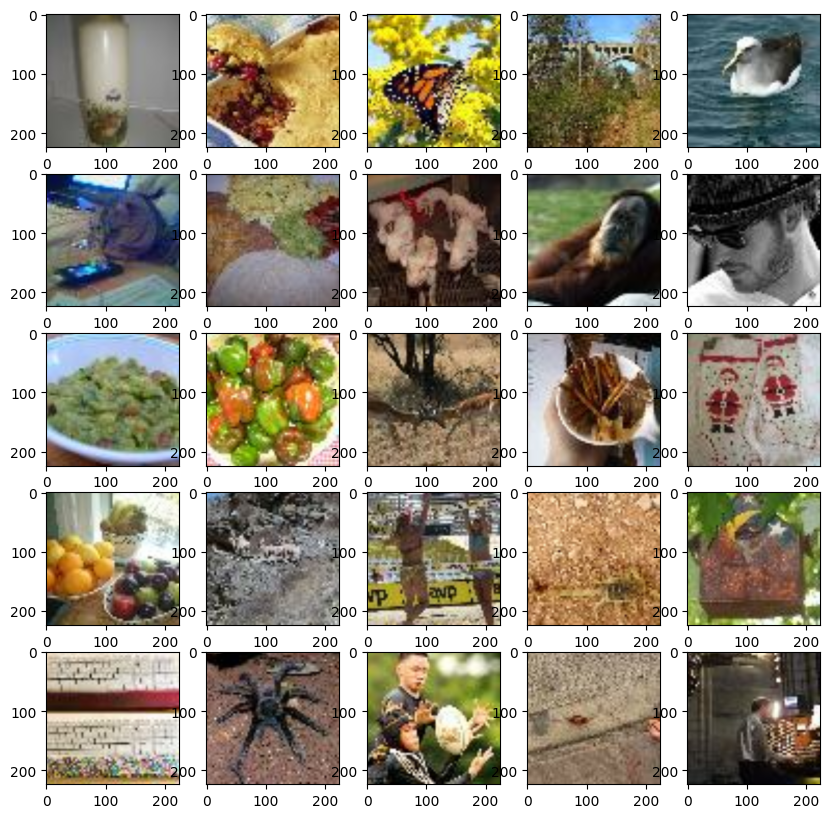

In [57]:
show_25_images(testing_images)

In [58]:
!pip install tf_keras_vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 6.8 MB/s eta 0:00:00


In [59]:
from vis.utils import utils
from matplotlib import cm
from tensorflow import keras
from tf_keras_vis.gradcam import Gradcam
import matplotlib.pyplot as plt
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras.applications.vgg16 import preprocess_input
from IPython.display import Image, display

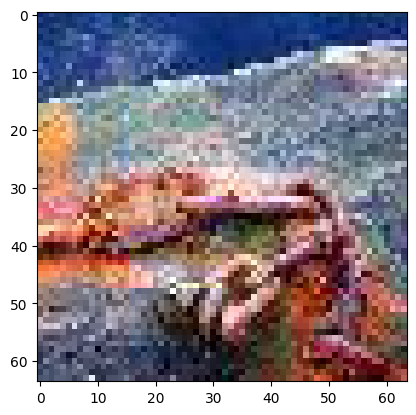

In [60]:
img_path="/content/tiny-imagenet-200/test/images/test_1895.JPEG"
img=keras.preprocessing.image.load_img(img_path)
plt.imshow(img)

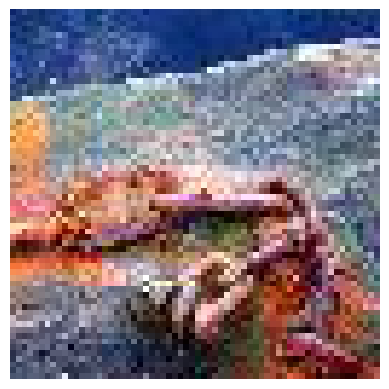

1/1 [==============================] - 1s 622ms/step

last_conv_layer_model:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                  

<ipython-input-61-f502286a2680>:89: RuntimeWarning: invalid value encountered in true_divide
  heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
<ipython-input-61-f502286a2680>:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


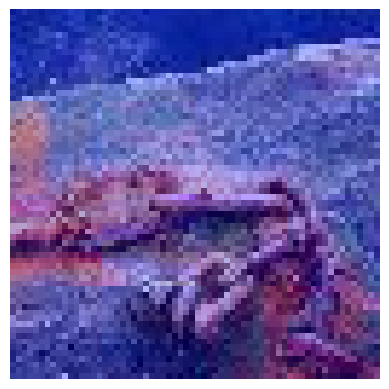

In [61]:
model_builder = keras.applications.vgg16.VGG16
img_size = (224, 224)
preprocess_input = keras.applications.vgg16.preprocess_input
decode_predictions = keras.applications.vgg16.decode_predictions

last_conv_layer_name = "block5_conv3"
classifier_layer_names = ["block5_pool", "flatten", "hidden1", "predictions"]

img_path="/content/tiny-imagenet-200/test/images/test_1895.JPEG"
img=keras.preprocessing.image.load_img(img_path)
plt.imshow(img); plt.axis("off"); plt.show()

def get_img_array(img_path, size):
  # `img` is a PIL image of size 224x224
  img = keras.preprocessing.image.load_img(img_path, target_size=size)
  # `array` is a float32 Numpy array of shape (224, 224, 3)
  array = keras.preprocessing.image.img_to_array(img)
  # We add a dimension to transform our array into a "batch"
  # of size (1, 224, 224, 3)
  array = np.expand_dims(array, axis=0)
  return array

def make_gradcam_heatmap(img_array, model, 
                         last_conv_layer_name, classifier_layer_names):
  # First, we create a model that maps the input image to the activations
  # of the last conv layer
  last_conv_layer = model.get_layer(last_conv_layer_name)
  last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)
  
  #Imprime o modelo da rede ate a ultima camada convolucional
  print("\nlast_conv_layer_model:"); last_conv_layer_model.summary(); print()

  # Second, we create a model that maps the activations of the last conv
  # layer to the final class predictions
  classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
  x = classifier_input
  for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
  classifier_model = keras.Model(classifier_input, x)

  #Imprime o modelo da rede da ultima camada convolucional ate predicao
  print("\nclassifier_model:"); classifier_model.summary(); print()

  # Then, we compute the gradient of the top predicted class for our input image
  # with respect to the activations of the last conv layer
  with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    print("preds:",type(preds),preds.shape,preds.dtype)
    top_pred_index = tf.argmax(preds[0])
    print("top_pred_index:",top_pred_index)
    top_class_channel = preds[:, top_pred_index]
    print("top_class_channel:",top_class_channel,
          type(top_class_channel),top_class_channel.shape,top_class_channel.dtype)

  # This is the gradient of the top predicted class with regard to
  # the output feature map of the last conv layer
  grads = tape.gradient(top_class_channel, last_conv_layer_output)
  print("grads:",type(grads),grads.shape,grads.dtype)

  # This is a vector where each entry is the mean intensity of the gradient
  # over a specific feature map channel
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
  print("pooled_grads:",type(pooled_grads),pooled_grads.shape,pooled_grads.dtype)

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the top predicted class
  print("last_conv_layer_output:",type(last_conv_layer_output),
        last_conv_layer_output.shape,last_conv_layer_output.dtype)
  last_conv_layer_output = last_conv_layer_output.numpy()[0]
  print("last_conv_layer_output:",type(last_conv_layer_output),
        last_conv_layer_output.shape,last_conv_layer_output.dtype)
  pooled_grads = pooled_grads.numpy()
  print("pooled_grads:",type(pooled_grads),pooled_grads.shape,pooled_grads.dtype)  
  for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
  print("last_conv_layer_output:",type(last_conv_layer_output),
        last_conv_layer_output.shape,last_conv_layer_output.dtype)

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = np.mean(last_conv_layer_output, axis=-1)

  # For visualization purpose, we will also normalize the heatmap between 0 & 1
  # Elimina parte negativa (relu)
  heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
  return heatmap

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))



# Print what the top predicted class is
preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
  img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
# plt.matshow(heatmap); plt.show()

# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "cam_"+img_path; superimposed_img.save(save_path)

# Display Grad CAM
plt.imshow(superimposed_img); plt.axis("off"); plt.show()